<a href="https://colab.research.google.com/github/lacykaltgr/agriculture-image-processing/blob/laci420/tree_trunk_segmentation/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
colab = False

if colab:
    #from google.colab import drive
    #drive.mount('/content/drive')
    root = '/content/tree_trunk_segmentation/data/'
    device = 'cuda'
    #!wget -O treetrunk.zip https://github.com/lacykaltgr/agriculture-image-processing/archive/refs/heads/laci420.zip
    #!unzip treetrunk.zip
    #!cp -r agriculture-image-processing-laci420/tree_trunk_segmentation/ .
    #!cp agriculture-image-processing-laci420/unet.py .
    #!cp agriculture-image-processing-laci420/utils.py .
else:
    import sys
    import os
    root = 'data/'
    device = 'mps'
    #parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
    #sys.path.append(parent_directory)

In [2]:
from torch.utils.data import DataLoader
from tree_trunk_segmentation.src.dataset import XYDataset, load_dataset

x_train, y_train, x_val, y_val = load_dataset(root=root,
                                              #target_size_x=(4000, 3000),
                                              #target_size_y=(4000, 3000),
                                              val_split_ratio=0.9)
train_dataset = XYDataset(x_train, y_train)
val_dataset = XYDataset(x_val, y_val)

batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1)

(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32
(3000, 4000, 3)
(3000, 4000, 1)
float32


In [3]:
import torch
from torch import nn
from unet import UNet
from utils import EarlyStopper
from tree_trunk_segmentation.src.utils import binary_to_rgb

config = dict(
    in_channels=3,
    out_channels=1,
    hiddens=[4, 8, 16],
    dropouts=[0, 0.3, 0.3],  # hiddens
    maxpools=2,  # hiddens - 1
    kernel_sizes=3,  # 2*hiddens + 3*hiddens + 2
    paddings='same',  # 2*hiddens + 3*hiddens + 2
    strides=1,  # 2*hiddens + 3*hiddens
    criterion=nn.BCELoss(),
    output_activation=nn.Sigmoid(),
    activation=nn.LeakyReLU(),
    post_process=binary_to_rgb,
    dimensions=2,
    device=device
)
unet = UNet(**config).to(device)

In [4]:
unet.summary(input_shape=(1, 3, 4000, 3000))

Layer (type:depth-idx)                   Output Shape              Param #
UNet                                     [1, 1, 4000, 3000]        --
├─ModuleDict: 1-13                       --                        (recursive)
│    └─Conv2d: 2-1                       [1, 4, 4000, 3000]        112
├─LeakyReLU: 1-2                         [1, 4, 4000, 3000]        --
├─ModuleDict: 1-13                       --                        (recursive)
│    └─Conv2d: 2-2                       [1, 4, 4000, 3000]        148
├─LeakyReLU: 1-4                         [1, 4, 4000, 3000]        --
├─ModuleDict: 1-13                       --                        (recursive)
│    └─BatchNorm2d: 2-3                  [1, 4, 4000, 3000]        8
│    └─Dropout2d: 2-4                    [1, 4, 4000, 3000]        --
│    └─MaxPool2d: 2-5                    [1, 4, 2000, 1500]        --
│    └─Conv2d: 2-6                       [1, 8, 2000, 1500]        296
├─LeakyReLU: 1-6                         [1, 8, 2000, 15

In [5]:
es = EarlyStopper(patience=10)
unet.train_model(train_loader, val_loader, es, num_epochs=1000, learning_rate=0.002, device=device)

KeyboardInterrupt: 

In [ ]:
predictions, results = unet.predict(val_loader, device=device)

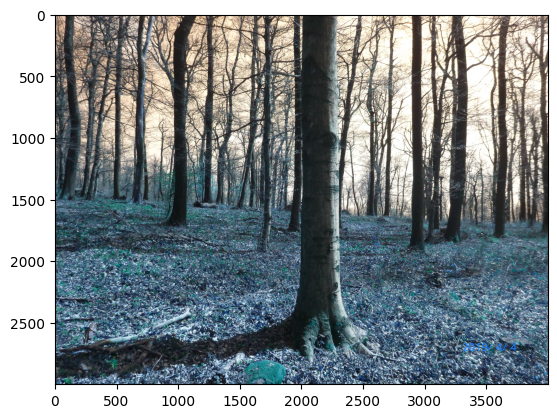

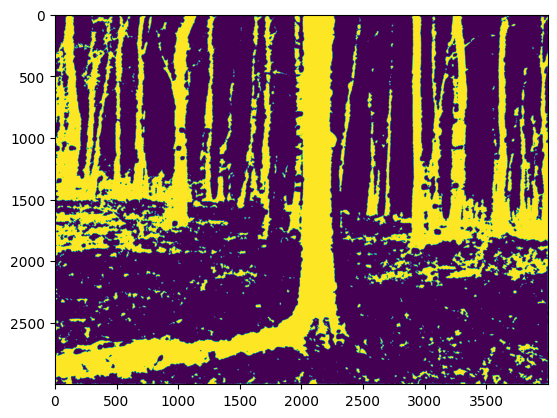

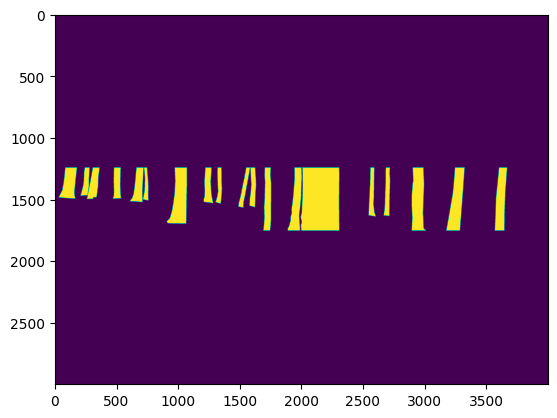

ValueError: ignored

In [12]:
from tree_trunk_segmentation.src.utils import plot_results

pred = unet(val_dataset[1][0].cuda().unsqueeze(0)).detach().cpu().numpy()
bin = (pred > 0.05).astype(int)

plot_results(x_val[1], y_val[1], bin)

In [ ]:
unet.load_state_dict(torch.load('/Users/laszlofreund/code/ai/satellite-image-segmentation/unet.h5', map_location=device))

In [ ]:
eval = unet.evaluate(val_loader, device=device)

torch.Size([1, 1, 4000, 500]) torch.Size([1, 1, 4000, 500])
tensor([[[[False, False, False,  ..., False, False,  True],
          [ True, False, False,  ...,  True, False, False],
          [False,  True, False,  ..., False, False, False],
          ...,
          [False, False, False,  ...,  True, False, False],
          [False,  True, False,  ..., False, False, False],
          [False, False,  True,  ..., False,  True,  True]]]], device='mps:0')
torch.Size([1, 1, 4000, 500]) torch.Size([1, 1, 4000, 500])
tensor([[[[ True, False, False,  ..., False, False, False],
          [False, False, False,  ...,  True, False, False],
          [False, False, False,  ...,  True,  True,  True],
          ...,
          [False, False, False,  ...,  True, False, False],
          [ True, False, False,  ..., False, False, False],
          [False, False,  True,  ..., False, False,  True]]]], device='mps:0')


In [16]:
torch.save(unet.layers_upsample, "layers_upsample.pth")

In [4]:
from segments import SegmentsClient

client = SegmentsClient('8243f2013ed15d1e28aaa42d52a8447f9bbe4dfb')

In [5]:
dataset = client.get_dataset('laszlofreund/tree_trunk')

In [6]:
import matplotlib.pyplot as plt
from segments.utils import load_image_from_url, load_label_bitmap_from_url

In [7]:
import numpy as np
x = []
y = []
for sample in client.get_samples('laszlofreund/tree_trunk'):
    label = client.get_label(sample.uuid, labelset='ground-truth')

    image = load_image_from_url(sample.attributes.image.url)
    instance_bitmap = load_label_bitmap_from_url(label.attributes.segmentation_bitmap.url)

    x.append(np.array(image))
    y.append(np.array(instance_bitmap))


    """
    plt.imshow(image)
    plt.show()

    plt.imshow(instance_bitmap)
    plt.show()
    """

In [10]:
s = np.concatenate(x)

In [11]:
s.shape

(69000, 4000, 3)

In [12]:
import numpy as np

np.save('x.npy', np.stack(x))
np.save('y.npy', np.stack(y))

zsh:1: command not found: cwd


In [31]:
np.array(x[0])

array([[[150, 147, 114],
        [150, 145, 115],
        [187, 181, 155],
        ...,
        [165, 205, 241],
        [168, 214, 247],
        [170, 219, 251]],

       [[192, 188, 159],
        [170, 166, 139],
        [161, 155, 133],
        ...,
        [169, 208, 247],
        [168, 214, 248],
        [166, 215, 248]],

       [[197, 195, 172],
        [184, 179, 159],
        [153, 147, 131],
        ...,
        [176, 215, 255],
        [178, 222, 255],
        [176, 224, 255]],

       ...,

       [[115, 124,  35],
        [114, 122,  37],
        [110, 117,  37],
        ...,
        [ 67,  61,  25],
        [ 69,  61,  25],
        [ 75,  66,  33]],

       [[121, 132,  40],
        [120, 130,  41],
        [117, 125,  40],
        ...,
        [ 64,  59,  27],
        [ 61,  55,  23],
        [ 69,  63,  31]],

       [[123, 134,  38],
        [121, 132,  40],
        [117, 125,  39],
        ...,
        [ 59,  56,  25],
        [ 53,  48,  18],
        [ 61,  56,  26]]

In [32]:
x_data = []
y_data = []
for X, Y in zip(x, y):
    x_data.append(np.array(X))
    y_data.append(np.array(Y))

np.save('x.npy', np.concatenate(x_data))
np.save('y.npy', np.concatenate(y_data))